In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

In [2]:
from ipywidgets import interactive, interact
from IPython.display import Audio, display, clear_output, HTML

In [3]:
def beat_freq(f1=220.0, f2=224.0):
    max_time = 3
    rate = 8000
    times = np.linspace(0,max_time,rate*max_time)
    signal = np.sin(2*np.pi*f1*times) + np.sin(2*np.pi*f2*times)
    print(f1, f2, abs(f1-f2))
    display(Audio(data=signal, rate=rate))
    return signal

In [4]:
v = interactive(beat_freq, f1=(200.0,300.0), f2=(200.0,300.0))
display(v)

220.0 224.0 4.0


In [5]:
f1, f2 = v.children
f1.value = 250
f2.value = 260
plt.plot(v.result[0:6000])

ValueError: too many values to unpack (expected 2)

In [6]:
from sympy import Symbol, Eq, factor, init_printing
init_printing(use_latex='mathjax')

In [7]:
x = Symbol('x')

In [8]:
def factorit(n):
    display(Eq(x**n-1, factor(x**n-1)))

In [9]:
interact(factorit, n=(2,40));

 21               ⎛ 2        ⎞ ⎛ 6    5    4    3    2        ⎞ ⎛ 12    11    
x   - 1 = (x - 1)⋅⎝x  + x + 1⎠⋅⎝x  + x  + x  + x  + x  + x + 1⎠⋅⎝x   - x   + x

9    8    6    4    3        ⎞
  - x  + x  - x  + x  - x + 1⎠

In [10]:
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

In [12]:
def solve_lorenz(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x, y, z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorentz system."""
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t

TypeError: lorenz_deriv() missing 2 required positional arguments: 'z' and 't0'

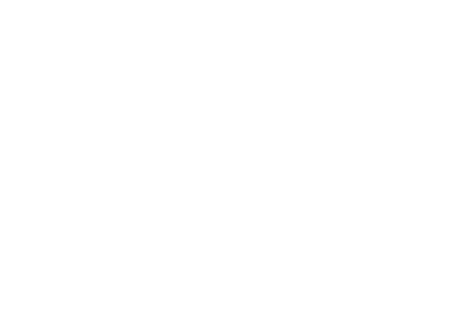

In [13]:
t, x_t = solve_lorenz(angle=0, N=10)

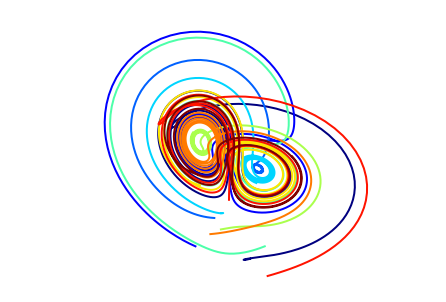

In [13]:
w = interactive(solve_lorenz, angle=(0.,360.), N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(w)

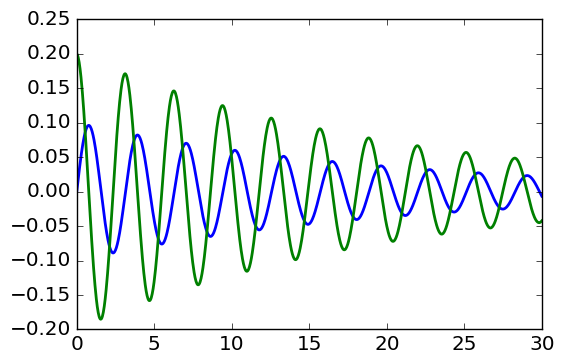

In [19]:
def deriv(y,t): # return derivatives of the array y
    a = -4.0
    b = -0.1
    return np.array([ y[1], a*y[0]+b*y[1] ])

time = np.linspace(0.0,30.0,1000)
yinit = np.array([0.0005,0.2]) # initial values

y = integrate.odeint(deriv,yinit,time)

plt.figure()
plt.plot(time,y[:,0],lw=2) # y[:,0] is the first column of y
plt.plot(time,y[:,1],lw=2)
#xlabel(‘t’)
#ylabel(‘y’)
plt.show()

In [20]:
w = interactive(integrate.odeint(deriv, np.array([(0,5),(0,5)]),time))
plt.plot(time,y[:,0],lw=2)
plt.show()

ValueError: Initial condition y0 must be one-dimensional.